In [2]:
import numpy as np
import random
from itertools import combinations
import p2clust
from sklearn import metrics
from experimentacion import Experiments
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from pckmeansMonotonic import PCKmeans
sns.set()
import itertools
import sklearn
import sklearn.impute
#set matplotlib plots for dark theme code editor
#plt.style.use('dark_background')

In [3]:
#load shanghaiData without taking the first column as index
x = pd.read_csv('shanghaiData.csv', index_col=None)
#select rows from x in which the value of the column year is the maximum value
x = x.loc[x['year'] == x['year'].max()]
#replace the first 50 values for world_rank with string "1-50"
x.iloc[0:50,0] = "1-50"
#replace the second 50 values for world_rank with string "51-100"
x.iloc[50:100,0] = "51-100"
#drop university_name, national_rank, total_score and year from x
x = x.drop(['university_name', 'national_rank', 'total_score', 'year'], axis=1)
#drop the world_rank column from x and save it as labels named y
y = pd.DataFrame(x.pop('world_rank'), columns=['world_rank'])
y.reset_index(drop=True, inplace=True)
#standarize x using sklearn and comvert it to a dataframe with the same column names
x = pd.DataFrame(sklearn.preprocessing.StandardScaler().fit_transform(x), columns=x.columns)
#print x head
x.head()

,alumni,award,hici,ns,pub,pcp
0,7.265386,6.026357,6.434960,7.146808,4.895740,6.230287
1,2.583979,5.349018,4.924552,4.624280,2.544579,3.636107
2,4.754952,4.769371,3.444504,4.877376,1.784851,5.251781
3,4.510224,4.684703,3.861954,4.244635,2.328657,3.943313
4,5.457557,5.804919,2.700685,3.400980,2.208699,3.863667


In [4]:
#get the shape of x
print(x.shape)

(500, 6)


In [5]:
#Use knn imputer to impute the missing values in x
x = pd.DataFrame(sklearn.impute.KNNImputer(n_neighbors=10).fit_transform(x), columns=x.columns)
x.head()

,alumni,award,hici,ns,pub,pcp
0,7.265386,6.026357,6.434960,7.146808,4.895740,6.230287
1,2.583979,5.349018,4.924552,4.624280,2.544579,3.636107
2,4.754952,4.769371,3.444504,4.877376,1.784851,5.251781
3,4.510224,4.684703,3.861954,4.244635,2.328657,3.943313
4,5.457557,5.804919,2.700685,3.400980,2.208699,3.863667


In [6]:
#check if x contains missing values and print the result
print(x.isnull().values.any())

False


In [8]:
exp = Experiments(x = x.values, y = y.values.flatten(), nRest = int(len(x)*0.50))

COP: K = 7 [x]  -->  DONE
Saving clusters to csv from model COP: K = 7 ...
P2Clust: K = 7 [x]  -->  DONE
Saving clusters to csv from model P2Clust: K = 7 ...
PC-MONO: K = 7 [x]  -->  DONE
Saving clusters to csv from model PC-MONO: K = 7 ...


/home/german/.conda/envs/general/lib/python3.9/site-packages/sklearn/utils/extmath.py:189: RuntimeWarning: invalid value encountered in matmul
  ret = a @ b


PCSKMeans [x]  -->  DONE
Saving clusters to csv from model PCSKMeans ...
KMeans [x]  -->  DONE


/home/german/.conda/envs/general/lib/python3.9/site-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


Saving clusters to csv from model KMeans ...


In [8]:
#load labels as integers from file "PC-MONO: K = 7.csv" as numpy array
mono_labels = np.loadtxt("partitions/PCKM-Mono.csv", delimiter=",", dtype=int)
p2c_labels = np.loadtxt("partitions/P2Clust.csv", delimiter=",", dtype=int)
cop_labels = np.loadtxt("partitions/COPKMeans.csv", delimiter=",", dtype=int)
pcskm_labels = np.loadtxt("partitions/PCSKMeans.csv", delimiter=",", dtype=int)
kmeans_labels = np.loadtxt("partitions/KMeans.csv", delimiter=",", dtype=int)

/tmp/ipykernel_9661/3926220642.py:2: DeprecationWarning: loadtxt(): Parsing an integer via a float is deprecated.  To avoid this warning, you can:
    * make sure the original data is stored as integers.
    * use the `converters=` keyword argument.  If you only use
      NumPy 1.23 or later, `converters=float` will normally work.
    * Use `np.loadtxt(...).astype(np.int64)` parsing the file as
      floating point and then convert it.  (On all NumPy versions.)
  (Deprecated NumPy 1.23)
  mono_labels = np.loadtxt("partitions/PCKM-Mono.csv", delimiter=",", dtype=int)
/tmp/ipykernel_9661/3926220642.py:3: DeprecationWarning: loadtxt(): Parsing an integer via a float is deprecated.  To avoid this warning, you can:
    * make sure the original data is stored as integers.
    * use the `converters=` keyword argument.  If you only use
      NumPy 1.23 or later, `converters=float` will normally work.
    * Use `np.loadtxt(...).astype(np.int64)` parsing the file as
      floating point and then

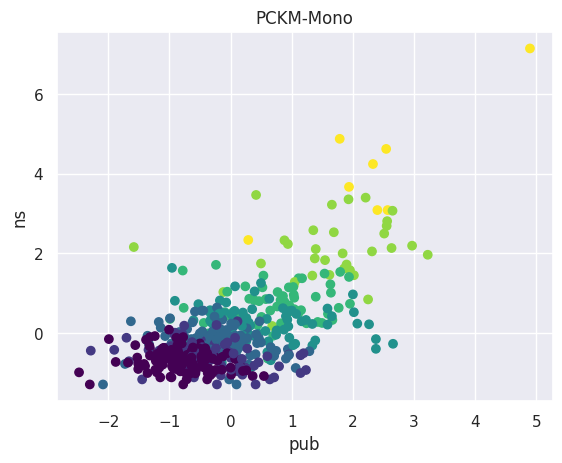

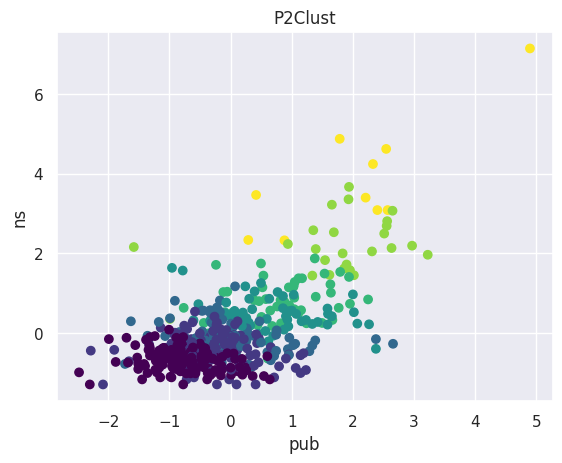

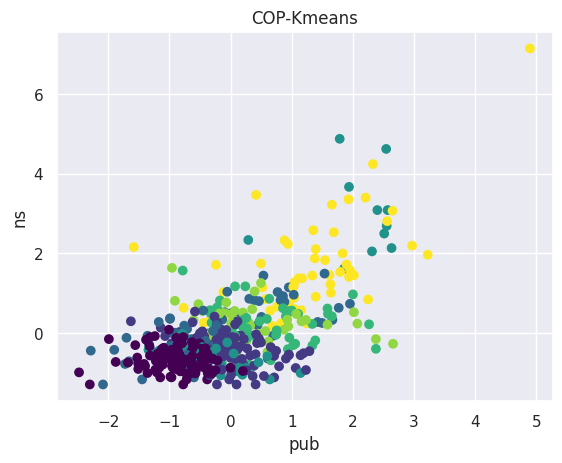

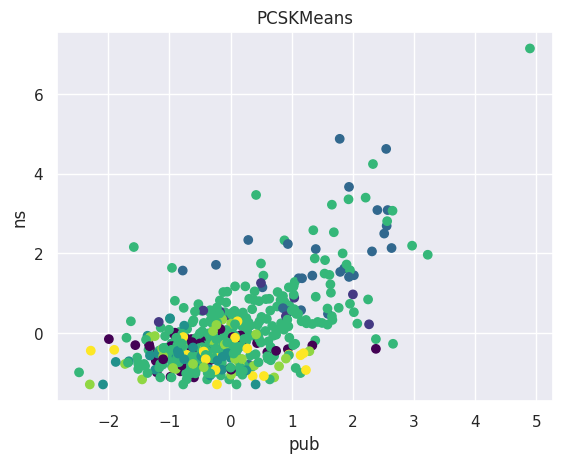

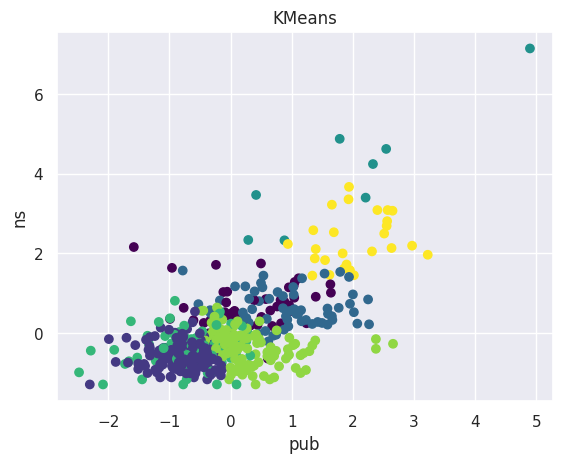

In [21]:
f1 = 4
f2 = 3
f1_name = x.columns[f1]
f2_name = x.columns[f2]

#plot features 3 and 4 of x using the labels from PC-MONO: K = 7.csv using plt.scatter
plt.scatter(x.iloc[:,f1], x.iloc[:,f2], c=mono_labels, cmap='viridis')
#set axis labels
plt.xlabel(f1_name)
plt.ylabel(f2_name)
#set title
plt.title('PCKM-Mono', fontsize=16)
#save plot as pdf adjusting the size of the figure
plt.savefig('partitions_plot/PCKMMono.pdf', bbox_inches='tight', dpi=300)
#show plot
plt.show()

#plot features 3 and 4 of x using the labels from P2Clust using plt.scatter
plt.scatter(x.iloc[:,f1], x.iloc[:,f2], c=p2c_labels, cmap='viridis')
#set axis labels
plt.xlabel(f1_name)
plt.ylabel(f2_name)
#set title
plt.title('P2Clust', fontsize=16)
#save plot as pdf adjusting the size of the figure
plt.savefig('partitions_plot/P2Clust.pdf', bbox_inches='tight', dpi=300)
#show plot
plt.show()

#plot features 3 and 4 of x using the labels from COP-Kmeans using plt.scatter
plt.scatter(x.iloc[:,f1], x.iloc[:,f2], c=cop_labels, cmap='viridis')
#set axis labels
plt.xlabel(f1_name)
plt.ylabel(f2_name)
#set title
plt.title('COP-Kmeans', fontsize=16)
#save plot as pdf adjusting the size of the figure
plt.savefig('partitions_plot/COP.pdf', bbox_inches='tight', dpi=300)
#show plot
plt.show()

#plot features 3 and 4 of x using the labels from PCSKMeans using plt.scatter
plt.scatter(x.iloc[:,f1], x.iloc[:,f2], c=pcskm_labels, cmap='viridis')
#set axis labels
plt.xlabel(f1_name)
plt.ylabel(f2_name)
#set title
plt.title('PCSKMeans', fontsize=16)
#save plot as pdf adjusting the size of the figure
plt.savefig('partitions_plot/PCSKMeans.pdf', bbox_inches='tight', dpi=300)
#show plot
plt.show()

#plot features 3 and 4 of x using the labels from KMeans using plt.scatter
plt.scatter(x.iloc[:,f1], x.iloc[:,f2], c=kmeans_labels, cmap='viridis')
#set axis labels
plt.xlabel(f1_name)
plt.ylabel(f2_name)
#set title
plt.title('KMeans', fontsize=16)
#save plot as pdf adjusting the size of the figure
plt.savefig('partitions_plot/KMeans.pdf', bbox_inches='tight', dpi=300)
#show plot
plt.show()


In [17]:
#get unique values from y
unique_y = np.unique(y.values.flatten())
flattened_y = y.values.flatten()
#iterate over unique values from y
for i in range(len(unique_y)):
    #replace the value of y with 1 if it is equal to the current value of i, otherwise replace it with 0
    positions = np.where(flattened_y == unique_y[i])
    flattened_y[positions] = str(i)

#convert flattened_y to a list of integers
flattened_y = flattened_y.astype(int)


[0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 6 6 6 6 6 6 6 6 6 6 6 6 6 6 6 6 6 6 6 6 6 6 6 6
 6 6 6 6 6 6 6 6 6 6 6 6 6 6 6 6 6 6 6 6 6 6 6 6 6 6 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2
 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3
 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3
 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3
 3 3 3 3 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4
 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4
 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 5 5 5 5 5 5 5
 5 5 5 5 5 5 5 5 5 5 5 5 5 5 5 5 5 5 5 5 5 5 5 5 5 5 5 5 5 5 5 5 5 5 5 5 5
 5 5 5 5 5 5 5 5 5 5 5 5 5 5 5 5 5 5 5 5 5 5 5 5 5 5 5 5 5 5 5 5 5 5 5 5 5
 5 5 5 5 5 5 5 5 5 5 5 5 

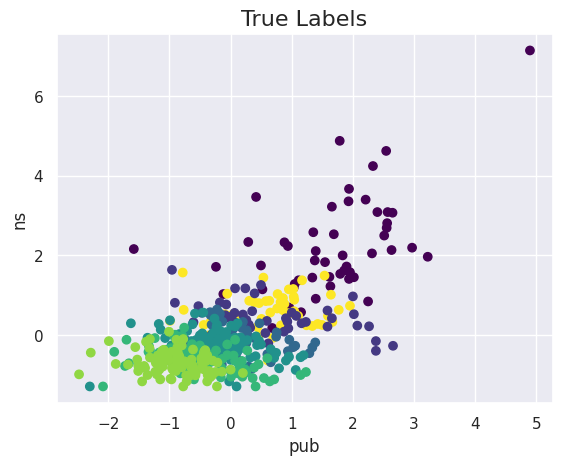

In [24]:
#plot features 3 and 4 of x using the labels from KMeans using plt.scatter
plt.scatter(x.iloc[:,f1], x.iloc[:,f2], c=flattened_y, cmap='viridis')
#set axis labels
plt.xlabel(f1_name)
plt.ylabel(f2_name)
#set title
plt.title('True Labels', fontsize=16)
#save plot as pdf adjusting the size of the figure
plt.savefig('partitions_plot/true.pdf', bbox_inches='tight', dpi=300)
#show plot
plt.show()

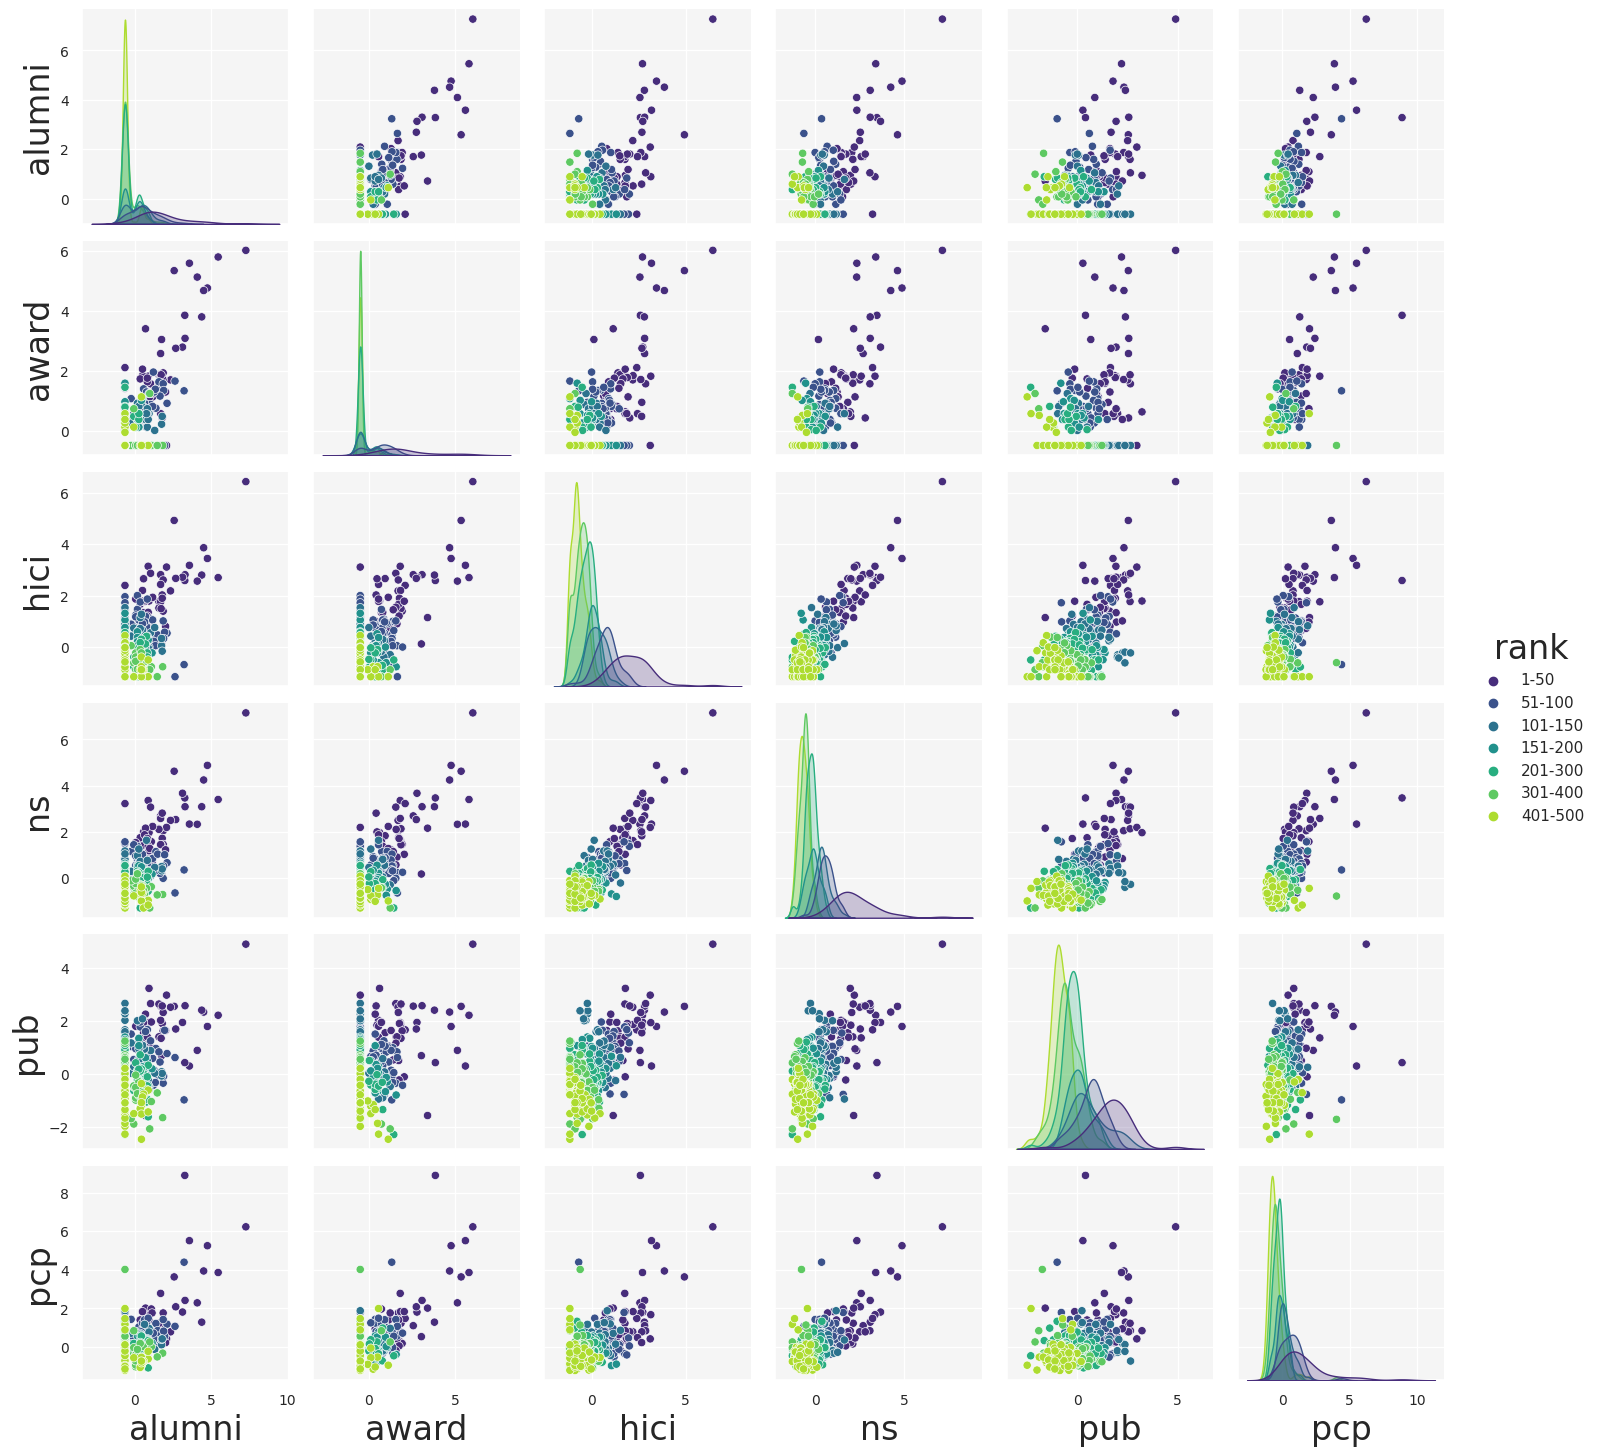

In [43]:
x['rank'] = y
#change the background color to grey
#increase the font size in the acxis labels
plt.rcParams.update({'font.size': 50})
#increase the size axis ticks labels
#make a pairplot for the dataset x with palette viridis using rank as the hue
sns.set(font_scale=2)
plt.rcParams['xtick.labelsize'] = 10
plt.rcParams['ytick.labelsize'] = 10
plt.rcParams['axes.facecolor'] = '#F5F5F5'
plt.rcParams['legend.fontsize'] = 11
sns.pairplot(x, hue='rank', palette="viridis")
# sns.legend(fontsize=50)
#save the pairplot in a pdf file with figure title "pairplot"
# plt.savefig('pairplot.pdf', bbox_inches='tight')

In [7]:
#drop the labels from dataset x
x = x.drop(['rank'], axis=1)

In [ ]:
#make a list for the number of restrictions going from 10% to 50% in steps of 5%
constraint_levels = [int(len(x)*0.10), int(len(x)*0.15), int(len(x)*0.20), int(len(x)*0.25), int(len(x)*0.30), int(len(x)*0.35), int(len(x)*0.40), int(len(x)*0.45), int(len(x)*0.50)]
number_of_experiments = 10
#for every restriction level in constraint_levels, run 10 experiments and save the results in a dataframe
final_results = pd.DataFrame(columns=['name', 'MI', 'ARI', 'Unsat', 'NMI1', 'NMI2'], dtype=float)
for i in constraint_levels:
    #print the constraint level
    print(i)
    #build a numpy array of 0 with shape equal to experiments.pd_results.shape
    aux_results = np.zeros(shape=(5,5), dtype=float)
    for j in range(number_of_experiments):
        #print the number of the experiment
        print(j)
        experiment = Experiments(x = x.values, y = y.values.flatten(), nRest = i)
        #convert experiments results to a numpy array dropping the name column and add them up to aux_results
        aux_results = aux_results + np.array(experiment.pd_results.drop(['name'], axis=1))

    #store aux results in an aux dataframe
    aux_results_df = pd.DataFrame(aux_results/number_of_experiments, columns=['MI', 'ARI', 'Unsat', 'NMI1', 'NMI2'], dtype=float)
    #append a column to the auxiliar dataframe with the name of the algorithms
    aux_results_df['name'] = ['COP-Kmeans', 'P2Clust', 'PCKM-MONO', "PCSKMeans", "KMeans"]
    #append a column to the auxiliar dataframe with the constraint level
    aux_results_df['nRest'] = i
    #append aux_results_df to final_results
    final_results = final_results.append(aux_results_df, ignore_index=True)

#save results to a file
final_results.to_csv('results.csv', index=False)
#print final_results
final_results

In [61]:
#load results from a file
final_results = pd.read_csv('results.csv')

In [62]:
constraint_levels

[50, 75]

In [63]:
final_results.columns
saved_final_results = final_results.copy()

In [64]:
paleta_gecco = ["#d63e3a", "#137070", "#a28870", "#f0b791", "#64a4b4", "#edad6f", "#5c9c5c", "#ff7736", "#5c9c94"]
paleta_gecco = ["#a28870", "#137070", "#d63e3a", "#5c9c5c", "#f0b791"]

In [65]:
#replace all instances of PCKM-MONO in column name of final results with string PCKM-Mono
final_results['name'] = final_results['name'].str.replace('PCKM-MONO', 'PCKM-Mono')
final_results.head()

,name,MI,ARI,Unsat,NMI1,NMI2,nRest
0,COP-Kmeans,0.507944,0.350589,0.000000,0.001022,0.160,50.0
1,P2Clust,0.642800,0.482429,0.171837,0.000000,0.000,50.0
2,PCKM-Mono,0.627352,0.468564,0.070204,0.000020,0.009,50.0
3,PCSKMeans,0.219712,0.125913,0.823673,0.135567,0.917,50.0
4,KMeans,0.430809,0.236943,0.260000,0.203832,0.916,50.0


In [58]:
#change order of rows in finals results to be PCKM-Mono, P2Clust, COP-Kmeans, KMeans, PCSKMeans
final_results = final_results.reindex([3, 1, 0, 4, 2])

In [60]:
final_results.head()

,name,MI,ARI,Unsat,NMI1,NMI2,nRest
3,PCSKMeans,0.219712,0.125913,0.823673,0.135567,0.917,50.0
1,P2Clust,0.642800,0.482429,0.171837,0.000000,0.000,50.0
0,COP-Kmeans,0.507944,0.350589,0.000000,0.001022,0.160,50.0
4,KMeans,0.430809,0.236943,0.260000,0.203832,0.916,50.0
2,PCKM-Mono,0.627352,0.468564,0.070204,0.000020,0.009,50.0


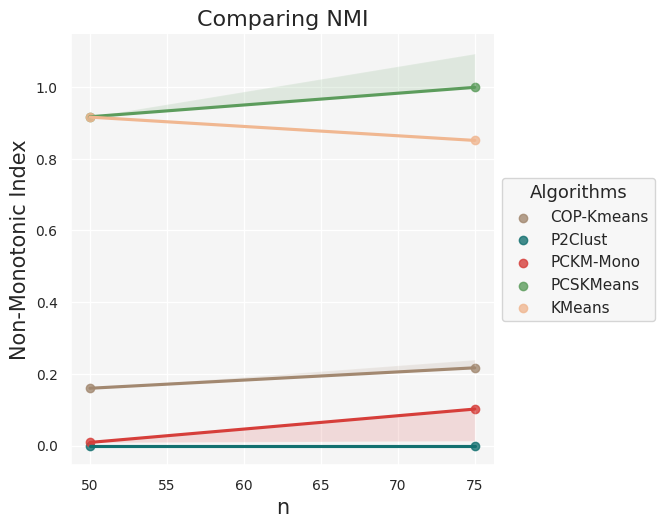

In [85]:
plt.rcParams['xtick.labelsize'] = 10
plt.rcParams['ytick.labelsize'] = 10
plt.rcParams['axes.facecolor'] = '#F5F5F5'
plt.rcParams['legend.fontsize'] = 11
plt.rcParams['legend.title_fontsize'] = 13
#make an lmplot for the ARI grouped by name with the constraint level as the x axis and the ARI as the y axis
sns.lmplot(x="nRest", y="NMI2", data=final_results, scatter=True, ci=50, hue="name", legend=False, order=1, palette=paleta_gecco)
# plt.rcParams.update({'font.size': 1})
#set figure and axis labels
plt.title('Comparing NMI', fontsize=16)
plt.xlabel('n', fontsize=15)
plt.ylabel('Non-Monotonic Index', fontsize=15)
#set legend title to "Algorithms"
# plt.legend().remove()
plt.legend(title='Algorithms', loc='center left', bbox_to_anchor=(1, 0.5))
#save image as pdf adjusting its size to contain the full figure
plt.savefig('NMI_vs_constraints.pdf', bbox_inches='tight', pad_inches=0.1)
#show the plot
plt.show()

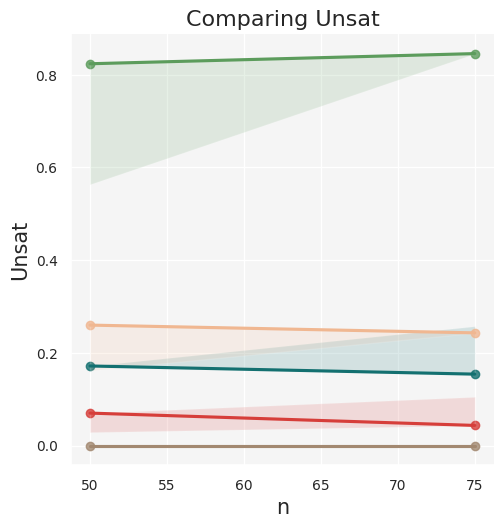

In [79]:
plt.rcParams['xtick.labelsize'] = 10
plt.rcParams['ytick.labelsize'] = 10
plt.rcParams['axes.facecolor'] = '#F5F5F5'
plt.rcParams['legend.fontsize'] = 10
#make an lmplot for the ARI grouped by name with the constraint level as the x axis and the ARI as the y axis
sns.lmplot(x="nRest", y="Unsat", data=final_results, scatter=True, ci=50, hue="name", legend=False, order=1, palette=paleta_gecco)
# plt.rcParams.update({'font.size': 1})
#set figure and axis labels
plt.title('Comparing Unsat', fontsize=16)
plt.xlabel('n', fontsize=15)
plt.ylabel('Unsat', fontsize=15)
#set legend title to "Algorithms"
plt.legend().remove()
# plt.legend(title='Algorithms', loc='center left', bbox_to_anchor=(1, 0.5))
#save image as pdf adjusting its size to contain the full figure
plt.savefig('Unsat_vs_constraints.pdf', bbox_inches='tight', pad_inches=0.1)
#show the plot
plt.show()

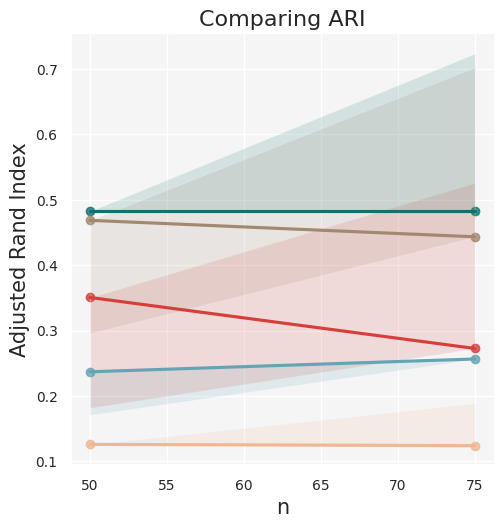

In [52]:
plt.rcParams['xtick.labelsize'] = 10
plt.rcParams['ytick.labelsize'] = 10
plt.rcParams['axes.facecolor'] = '#F5F5F5'
plt.rcParams['legend.fontsize'] = 10
#make an lmplot for the ARI grouped by name with the constraint level as the x axis and the ARI as the y axis
sns.lmplot(x="nRest", y="ARI", data=final_results, scatter=True, ci=50, hue="name", legend=False, order=1, palette=paleta_gecco)
# plt.rcParams.update({'font.size': 1})
#set figure and axis labels
plt.title('Comparing ARI', fontsize=16)
plt.xlabel('n', fontsize=15)
plt.ylabel('Adjusted Rand Index', fontsize=15)
#set legend title to "Algorithms"
plt.legend().remove()
# plt.legend(title='Algorithms', loc='center left', bbox_to_anchor=(1, 0.5))
#save image as pdf adjusting its size to contain the full figure
plt.savefig('ARI_vs_constraints.pdf', bbox_inches='tight', pad_inches=0.1)
#show the plot
plt.show()

In [38]:
def NMI2(x: list, clusters: list) -> float:
    """
    Non-Monocity Index (https://sci2s.ugr.es/sites/default/files/1-s2.0-S0169023X16303585-main.pdf)

    Numero de instancias no-montónicas dividido entre el total de instancias

    :param x: Conjunto de datos.
    :param cluster: Asignacion de cluster a cada instancia.
    :return: nuemro de instancias no-montónicas dividido entre el total de instancias
    """
    nmi = 0
    mon = [True] * len(x)

    for i in range(len(x)):
        j = 0
        while mon[i] and j < len(x):
            if not isMonotonic(i, j, x, clusters):
                nmi += 1.0
                mon[i] = False
                if mon[j]:
                    nmi += 1.0
                    mon[j] = False
            j += 1
    return nmi / len(x)

def isMonotonic(a: int, b: int, x: list, clusters: list) -> bool:
    """
    Compruba si dos instancias (a y b) se pueden comparar
    y en el caso de que lo sea devuelve si la asignación
    de dichas instancias ha sido monotónica (no ha violado
    la monotonía).
    :param a: Instancia a
    :param b: Instancia b
    :param x: Conjunto de datos.
    :param cluster: Asignacion de cluster a cada instancia.
    :return: Booleano indicando si se viola o no las restricciones de monotonia
    """

    state = comparableState(a, b, x)
    if state == '=':
        return clusters[a] == clusters[b]
    elif state == '<':
        return clusters[a] <= clusters[b]
    elif state == '>':
        return clusters[a] >= clusters[b]
    elif state == '<>':
        return True

def comparableState(a: int, b: int, x: list) -> str:
    """
    Funcion que comprueba si dos elementos son comparables y cual es
    su condicion de comparabilidad (<, >, =, <>)
    :param a: Instancia a
    :param b: Instancia b
    :param x: Conjunto de datos.
    :return: string que indica la relacion que hay entre las instancias a y b
    """
    i = 0
    state = '='

    while i < len(x[a]):
        if state == '=':
            if x[a][i] < x[b][i]:
                state = '<'
            elif x[a][i] > x[b][i]:
                state = '>'
            else:
                state = '='

        elif state == "<":
            if x[a][i] < x[b][i]:
                state = '<'
            else:
                state = '<>'

        elif state == ">":
            if x[a][i] > x[b][i]:
                state = '>'
            else:
                state = '<>'
        i += 1
    return state

def NMI1(x: list, clusters: list) -> float:
    """
    Non-Monocity Index (https://sci2s.ugr.es/sites/default/files/1-s2.0-S0169023X16303585-main.pdf)

    Numero de instancias no-montónicas dividido entre el total de instancias

    :param x: Conjunto de datos.
    :param cluster: Asignacion de cluster a cada instancia.
    :return: nuemro de instancias no-montónicas dividido entre el total de instancias
    """
    nmi = 0
    for i in range(len(x)):
        for j in range(i, len(x)):
            if not isMonotonic(i, j, x, clusters):
                nmi += 2

    return nmi / (len(x) * len(x) - len(x))


0.0

In [84]:
#make an array of length 200 with numbers from 0 to 6 repeating 50 times each one
numerical_labels = np.repeat(np.arange(0, 4), 50)
numerical_labels = np.append(numerical_labels, np.repeat(np.arange(4, 7), 100))
#compute the non monotinic index of the original dataset with pandas
NMI1(x = x.values, clusters = numerical_labels)

0.069563126252505

In [71]:
#select results for NMI2 measure for PCKM-Mono algorithm from final results
PCKM_Mono = final_results[final_results['name'] == 'PCKM-Mono']
PCKM_Mono

,name,MI,ARI,Unsat,NMI1,NMI2,nRest
2,PCKM-Mono,0.646385,0.501335,0.073878,0.000103,0.0184,50.0
7,PCKM-Mono,0.646601,0.508110,0.052649,0.000103,0.0216,75.0
12,PCKM-Mono,0.657268,0.530986,0.041879,0.000131,0.0266,100.0
17,PCKM-Mono,0.676203,0.575999,0.027600,0.000079,0.0186,125.0
22,PCKM-Mono,0.686409,0.575485,0.037136,0.000127,0.0216,150.0
27,PCKM-Mono,0.700273,0.616294,0.026312,0.000176,0.0272,175.0
32,PCKM-Mono,0.692484,0.595875,0.028884,0.000434,0.0534,200.0
37,PCKM-Mono,0.695066,0.596833,0.034738,0.000819,0.0786,225.0
42,PCKM-Mono,0.746377,0.691083,0.016019,0.000488,0.0414,250.0


In [76]:
#reverse array of numerical labels
numerical_labels = np.flip(numerical_labels)
numerical_labels

array([6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6,
       6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6,
       6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6,
       6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6,
       6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5,
       5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5,
       5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5,
       5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5,
       5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5,
       5, 5, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4,
       4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4,
       4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4,
       4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4,
       4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 3,